# Vježba 6 - Frekvencijska analiza signala korištenjem DFT

DFT je u Pythonu-u implementirana FFT algoritmom iz Numpy biblioteke. Uputstvo za korištenje funkcija <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft">fft</a> i <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.ifft.html#numpy.fft.ifft">ifft</a> je moguće pronaći u zvaničnoj Numpy dokumentaciji.

## DFT periodičnih signala

1. Dat je diskretni signal $x(n) = cos(n \pi / 3)$. Da li je dati signal periodičan? Ako jeste, odrediti njegov period. U Pythonu-u generisati odmjerke datog signala na jednom periodu. Nacrtati talasni oblik signala. 

In [83]:
%matplotlib notebook
import matplotlib.pyplot as pyplot
import numpy as np
import numpy.fft as fft
import scipy.signal as signal

<IPython.core.display.Javascript object>


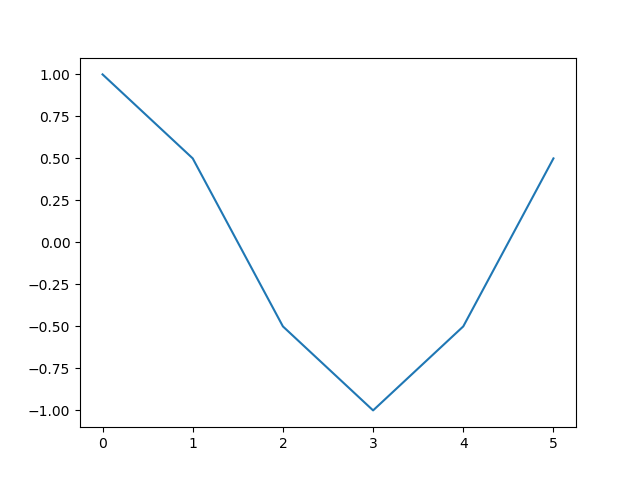

In [61]:
### KOD
N = 6
n = np.arange(0, N)
x = np.cos(np.pi * n / 3)
pyplot.figure()
pyplot.plot(n, x)

2. Izračunati DFT datog signala bez dopunjavanja nulama. Nacrtati moduo DFT, a na apscisi označiti indeks DFT (koristiti naredbu stem).

<IPython.core.display.Javascript object>


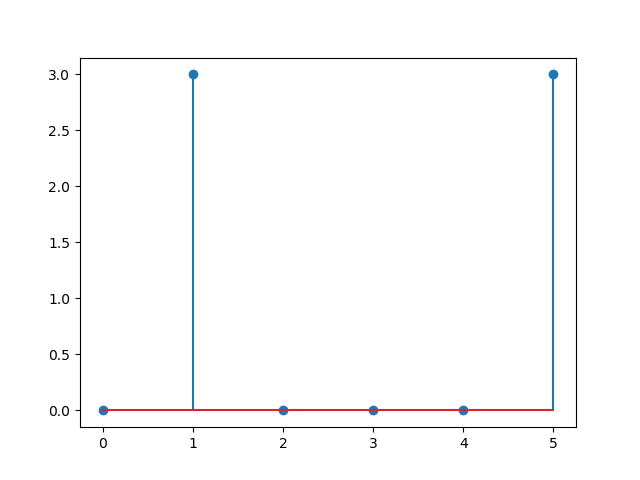

<StemContainer object of 3 artists>

In [62]:
### KOD
xDft = fft.fft(x)
pyplot.figure()
pyplot.stem(np.abs(xDft))

3. Nacrtati amplitudni spektar diskretnog signala $x(n)$ (kontinualna funkcija, koristiti naredbu plot) tako da na apscisi bude digitalna frekvencija normalizovana tako da vrijednost 1 odgovara frekvenciji od $\pi$ rad/odmjerku. Nacrtati dva grafika: na jednom na ordinati treba da bude moduo spektra signala, a na drugom moduo u dB.

<IPython.core.display.Javascript object>


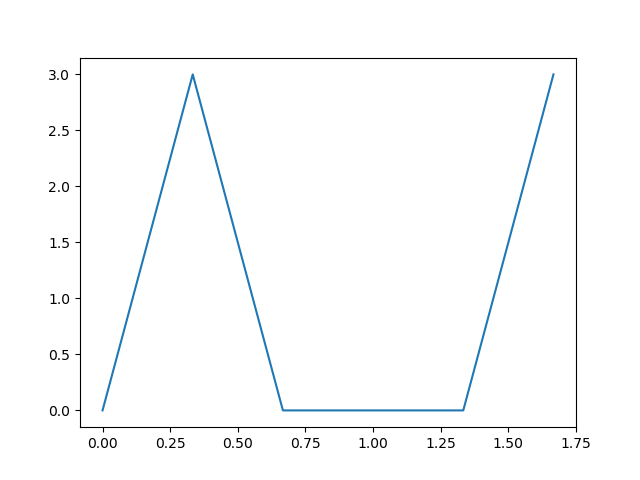

<IPython.core.display.Javascript object>


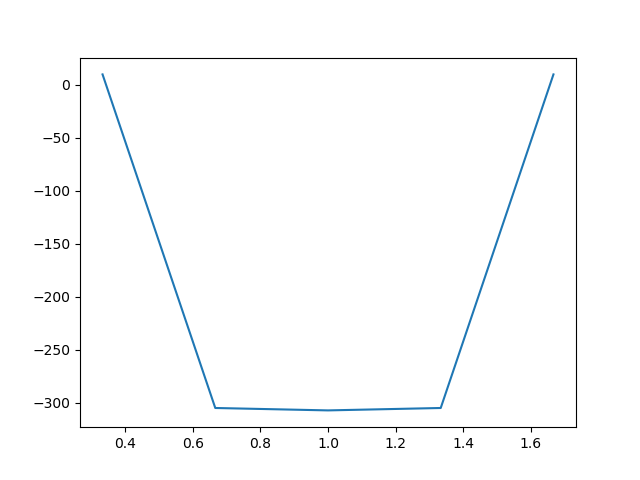

[0.00000000e+00 3.00000000e+00 5.76888806e-16 4.44089210e-16
 5.76888806e-16 3.00000000e+00]
[         -inf    9.54242509 -304.77815776 -307.05059558 -304.77815776
    9.54242509]


C:\Users\Gebruiker\Anaconda3\envs\odos\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
C:\Users\Gebruiker\Anaconda3\envs\odos\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


In [66]:
### KOD
pyplot.figure()
w = (2 * n) / N
pyplot.plot(w, np.abs(xDft))
pyplot.figure()
print(np.abs(xDft))
print(20 * np.log10(np.abs(xDft)))
pyplot.plot(w, 20 * np.log10(np.abs(xDft)))

4. Generisati odmjerke signala iz tačke 1. na tri perioda. Nacrtati njegov talasni oblik.

<IPython.core.display.Javascript object>


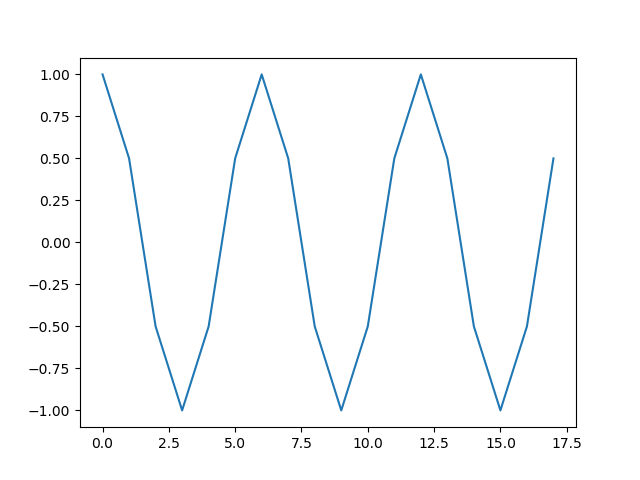

In [68]:
### KOD
pyplot.figure()
n = np.arange(0, N * 3)
x = np.cos(np.pi * n / 3)
pyplot.plot(n, x)

5. Izračunati DFT datog signala bez dopunjavanja nulama. Nacrtati moduo DFT, a na apscisi označiti indeks DFT (koristiti naredbu stem).

<IPython.core.display.Javascript object>


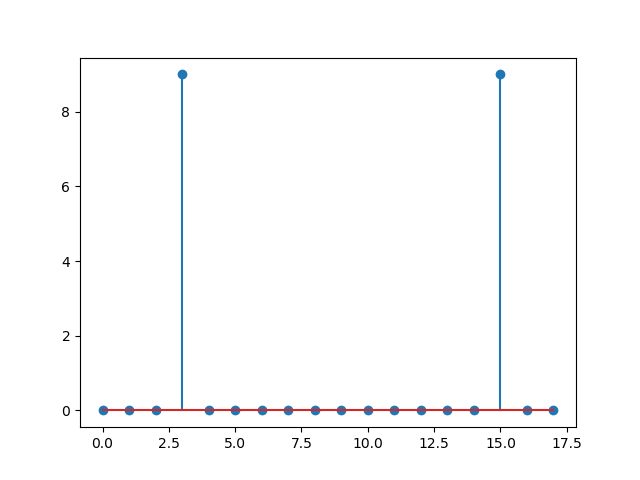

<StemContainer object of 3 artists>

In [69]:
### KOD
xDft = fft.fft(x)
pyplot.figure()
pyplot.stem(np.abs(xDft))

6. Nacrtati amplitudni spektar diskretnog signala $x(n)$ (kontinualna funkcija, koristiti naredbu plot) tako da na apscisi bude digitalna frekvencija normalizovana tako da vrijednost 1 odgovara frekvenciji od $\pi$ rad/odmjerku. Nacrtati dva grafika: na jednom na ordinati treba da bude moduo spektra signala, a na drugom moduo u dB. Uporediti dobijene grafike sa odgovarajućim graficima iz tačke 3. U čemu su njihove sličnosti i razlike?

<IPython.core.display.Javascript object>


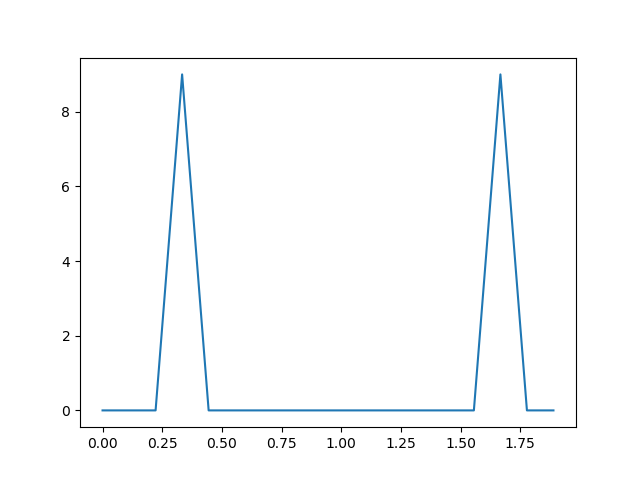

C:\Users\Gebruiker\Anaconda3\envs\odos\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


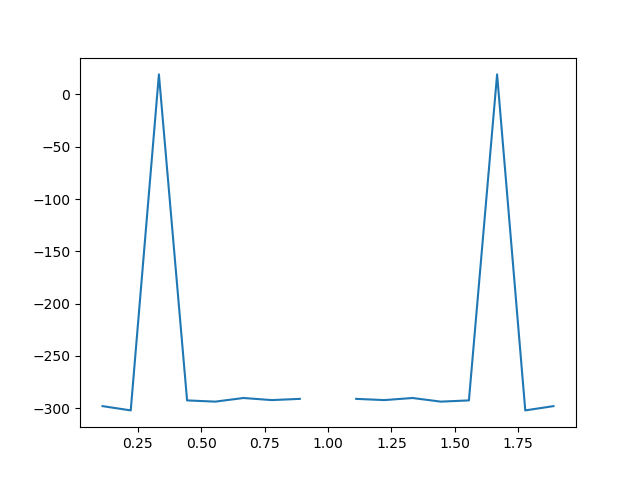

C:\Users\Gebruiker\Anaconda3\envs\odos\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


In [70]:
### KOD
freq = (2 * n) / (3 * N)
pyplot.figure()
pyplot.plot(freq, np.abs(xDft))
pyplot.figure()
pyplot.plot(freq, 20 * np.log10(np.abs(xDft)))

## Preklapanje u vremenskom domenu

1. Dat je signal $x(n) = a^{n} u(n)$. Spektar ovog signala je dat sa $ X\left(e^{j\omega}\right) = \frac{\displaystyle 1}{\displaystyle 1 - a e^{-j\omega}}$. Generisati odmjerke spektra dobijene odmjeravanjem u N=5 i N=50 tačaka. Nacrtati dobijene diskretizovane spektre.

<IPython.core.display.Javascript object>


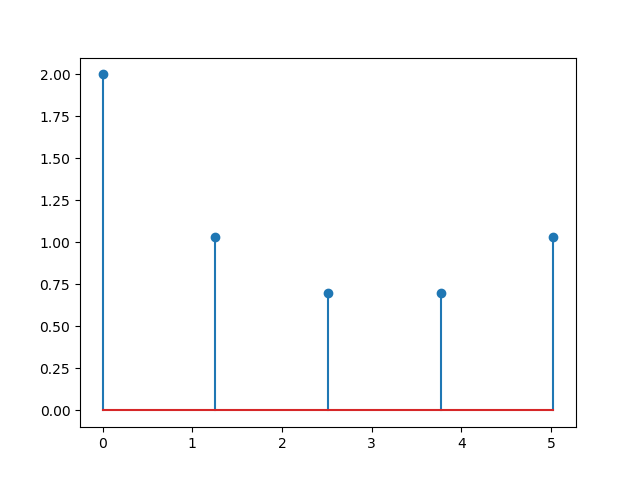

<IPython.core.display.Javascript object>


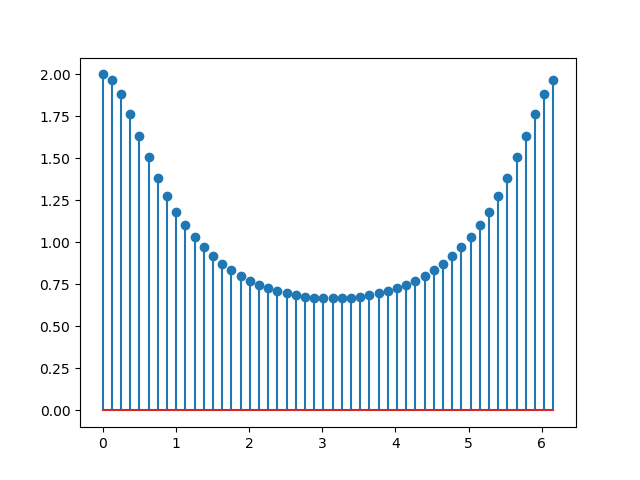

<StemContainer object of 3 artists>

In [73]:
### KOD
N = 5
a = 0.5
n = np.arange(0, N)
w = 2 * n * np.pi / N
X5 = 1 / (1 - a*np.e**(-1j * w))
pyplot.figure()
pyplot.stem(w, np.abs(X5))

N = 50
a = 0.5
n = np.arange(0, N)
w = 2 * n * np.pi / N
X50 = 1 / (1 - a*np.e**(-1j * w))
pyplot.figure()
pyplot.stem(w, np.abs(X50))


2. Korištenjem funkcije ifft rekonstruisati signal na osnovu odmjeraka spektara iz prethodne tačke. Da li se javlja preklapanje u vremenskom domenu?

<IPython.core.display.Javascript object>


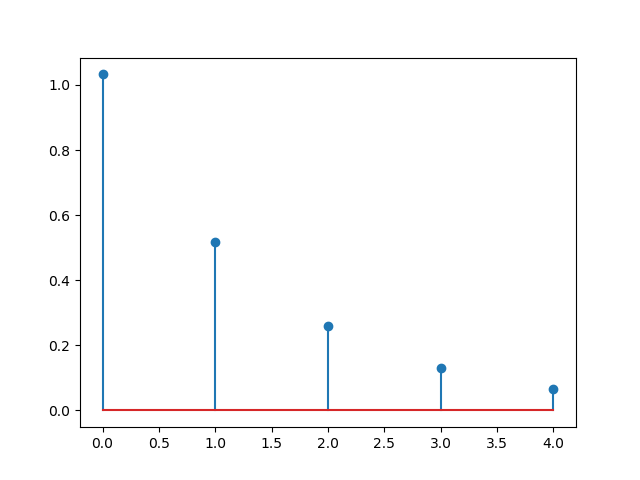

<IPython.core.display.Javascript object>


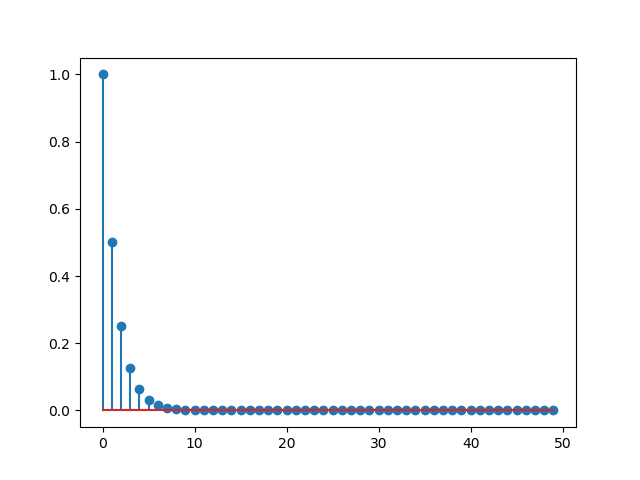

<StemContainer object of 3 artists>

In [75]:
### KOD
result5 = fft.ifft(X5)
result50 = fft.ifft(X50)

pyplot.figure()
pyplot.stem(result5.real)
pyplot.figure()
pyplot.stem(result50.real)

## Dopunjavanje nulama

1. Generisati pravougaoni signal
$$
x(n) = \begin{cases}
      1, & 0 \le n \le L-1 \\
      0, & \text{inače}
    \end{cases},
$$za $L = 10$.

In [52]:
### KOD
N = 10
L = 10
n = np.arange(0, N)
x = np.pad(np.ones(L), (0, N - L), mode = "constant", constant_values = 0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


2. Odrediti DFT datog signala u N=50 tačaka uz dopunjavanje nulama. Nacrtati moduo DFT, a na apscisi označiti indeks DFT (koristiti naredbu stem).

<IPython.core.display.Javascript object>


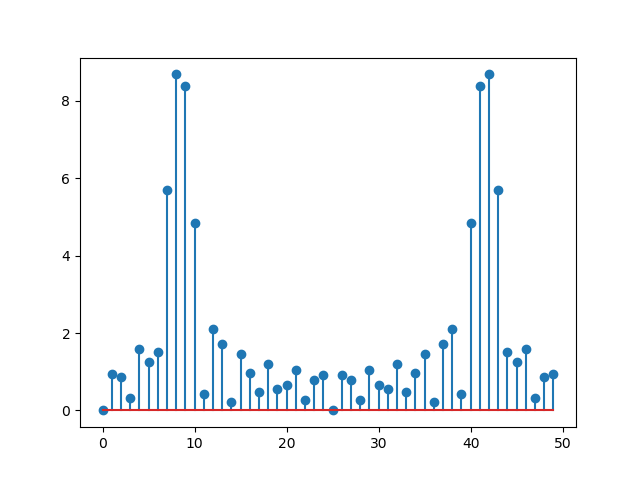

<StemContainer object of 3 artists>

In [76]:
### KOD
xDft = fft.fft(x, 50)
pyplot.figure()
pyplot.stem(np.abs(xDft))

3. Nacrtati amplitudni spektar diskretnog signala $x(n)$ (kontinualna funkcija, koristiti naredbu plot) tako da na apscisi bude digitalna frekvencija normalizovana tako da vrijednost 1 odgovara frekvenciji od $\pi$ rad/odmjerku. Nacrtati dva grafika: na jednom na ordinati treba da bude moduo spektra signala, a na drugom moduo u dB. Uporediti dobijeni grafik sa tačnim amplitudnim spektrom signala iz tačke 1.

<IPython.core.display.Javascript object>


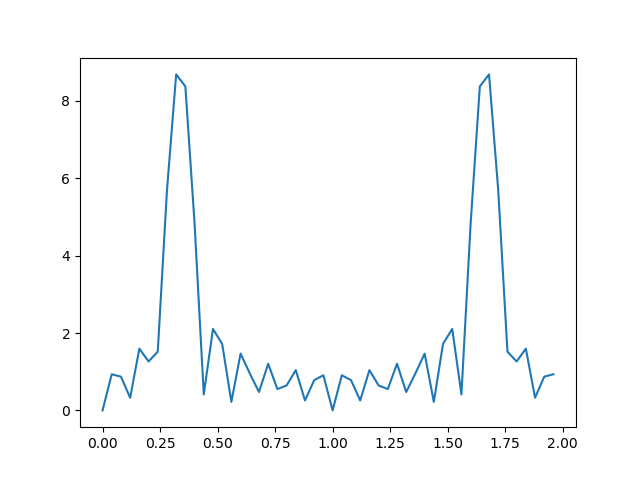

In [77]:
### KOD
n = np.arange(0, 50)
w = (2 * n / 50)
pyplot.figure()
pyplot.plot(w, np.abs(xDft))

4. Odrediti DFT datog signala u N=100 tačaka uz dopunjavanje nulama. Nacrtati moduo DFT, a na apscisi označiti indeks DFT (koristiti naredbu stem).

In [79]:
### KOD
xDft = fft.fft(x, 100)

5. Nacrtati amplitudni spektar diskretnog signala $x(n)$ (kontinualna funkcija, koristiti naredbu plot) tako da na apscisi bude digitalna frekvencija normalizovana tako da vrijednost 1 odgovara frekvenciji od $\pi$ rad/odmjerku. Nacrtati dva grafika: na jednom na ordinati treba da bude moduo spektra signala, a na drugom moduo u dB. Uporediti dobijeni grafik sa tačnim amplitudnim spektrom signala iz tačke 1.

<IPython.core.display.Javascript object>


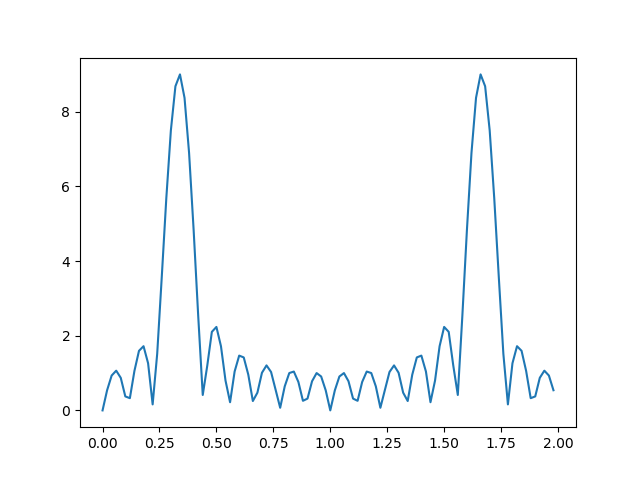

In [80]:
### KOD
n = np.arange(0, 100)
w = (2 * n / 100)
pyplot.figure()
pyplot.plot(w, np.abs(xDft))

## Filtriranje signala

1. Generisati 120 odmjeraka signal
$$
x(n) = cos\left(\frac{\displaystyle \pi}{2}n\right) + cos\left(\frac{\displaystyle \pi}{3}n\right) + cos\left(\frac{\displaystyle \pi}{4}n\right) + cos\left(\frac{\displaystyle \pi}{6}n\right).
$$ Nacratati talasni oblik generisanog signala. Nacrtati amplitudni spektar signala.

<IPython.core.display.Javascript object>


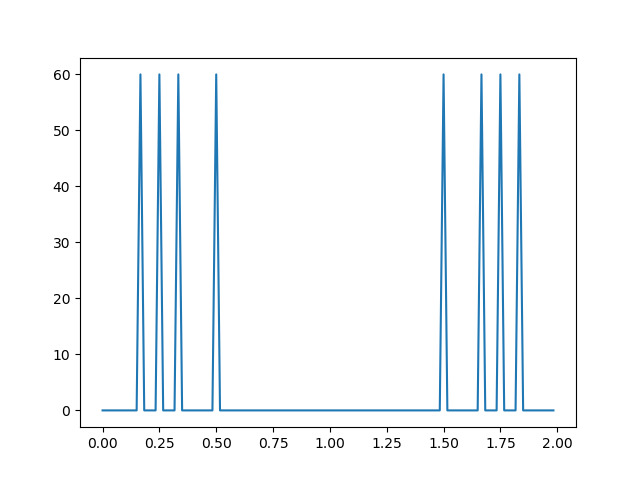

In [115]:
### KOD
n = np.arange(120)
x = np.cos(np.pi * n / 2) + np.cos(np.pi * n/ 3) + np.cos(np.pi * n / 4) + np.cos(np.pi * n / 6)
X = fft.fft(x)
pyplot.figure()
pyplot.plot(n * 2 / len(n), np.abs(X))

2. Korištenjem funkcija <a href="https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.buttord.html#scipy.signal.buttord">buttord</a> i <a href="https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.butter.html#scipy.signal.butter">butter</a> projektovati digitalni filtar sa sledećim zahtjevima:
    - granična frekvencija propusnog opsega 0.3 poluperioda/odmjerku
    - granična frekvencija nepropusnog opsega 0.45 poluperioda/odmjerku
    - maksimalno dozvoljeno slabljenje u propusnom opsegu 3dB
    - minimalno dozvoljeno slabljenje u nepropusnom opsegu 80db

In [105]:
### KOD
wp = 0.3
ws = 0.45
Ap = 3
As = 80
n, wn = signal.buttord(wp, ws, Ap, As)
b, a = signal.butter(n, wn)

3. Nacrati frekvencijsku karakteristiku ovako dobijenog filtra.

<IPython.core.display.Javascript object>


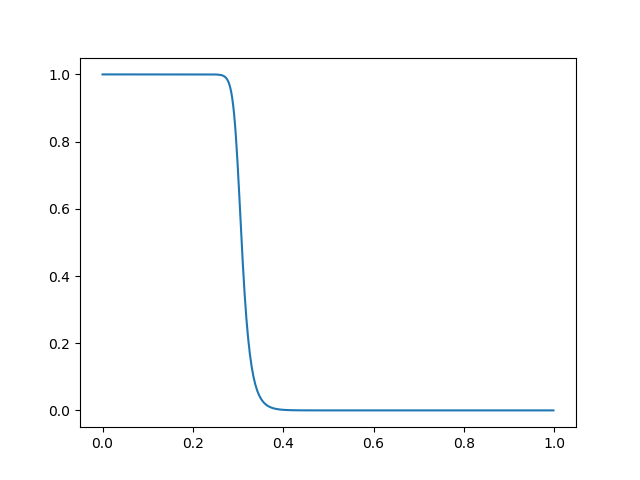

In [106]:
### KOD
w, X = signal.freqz(b, a)
pyplot.figure()
pyplot.plot(w / np.pi, np.abs(X))

3. Filtrirati signal iz tačke 1 ovako projektovanim filtrom. Nacrati talasni oblik i amplitudni spektar dobijenog signala.

<IPython.core.display.Javascript object>


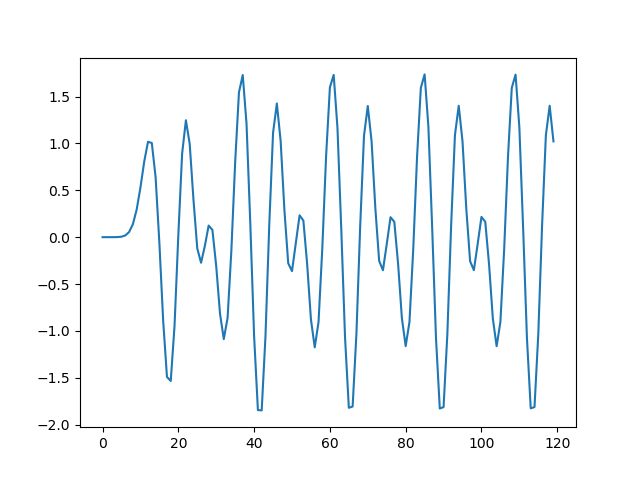

<IPython.core.display.Javascript object>


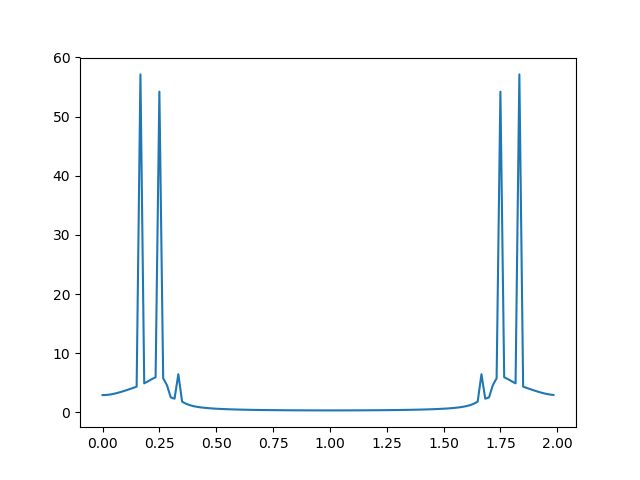

In [108]:
### KOD
y = signal.lfilter(b, a, x)
pyplot.figure()
pyplot.plot(y)
Y = fft.fft(y)
w = np.arange(len(Y)) * 2 / len(Y)
pyplot.figure()
pyplot.plot(w, np.abs(Y))

4. Korištenjem funkcija <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellipord.html#scipy.signal.ellipord">ellipord</a> i <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ellip.html#scipy.signal.ellip">ellip</a> projektovati digitalni filtar sa sledećim zahtjevima:
    - granična frekvencija propusnog opsega 0.3 poluperioda/odmjerku
    - granična frekvencija nepropusnog opsega 0.45 poluperioda/odmjerku
    - maksimalno dozvoljeno slabljenje u propusnom opsegu 3dB
    - minimalno dozvoljeno slabljenje u nepropusnom opsegu 80db

In [116]:
### KOD
n, wn = signal.ellipord(wp, ws, Ap, As)
b, a = signal.ellip(n, Ap, As, wn)

5. Nacrati frekvencijsku karakteristiku ovako dobijenog filtra.

<IPython.core.display.Javascript object>


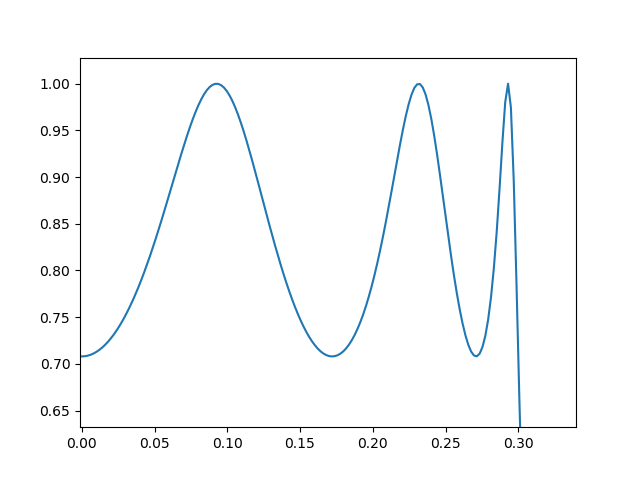

In [117]:
### KOD
w, X = signal.freqz(b, a)
pyplot.figure()
pyplot.plot(w / np.pi, np.abs(X))

6. Filtrirati signal iz tačke 1 ovako projektovanim filtrom. Nacrati talasni oblik i amplitudni spektar dobijenog signala. Komentarisati razlike u odnosu na rezultate iz tačke 3.

<IPython.core.display.Javascript object>


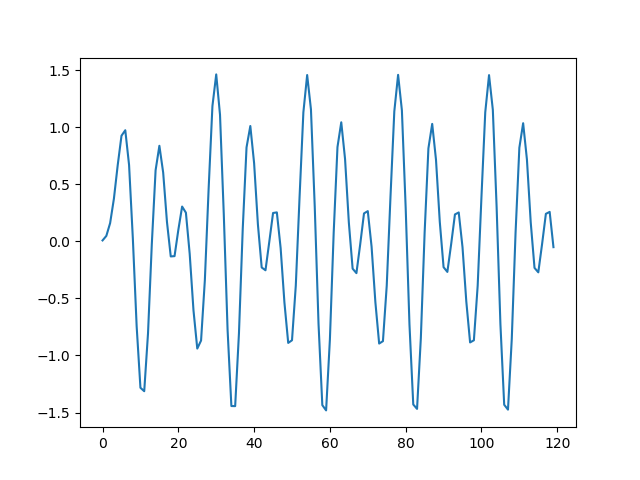

<IPython.core.display.Javascript object>


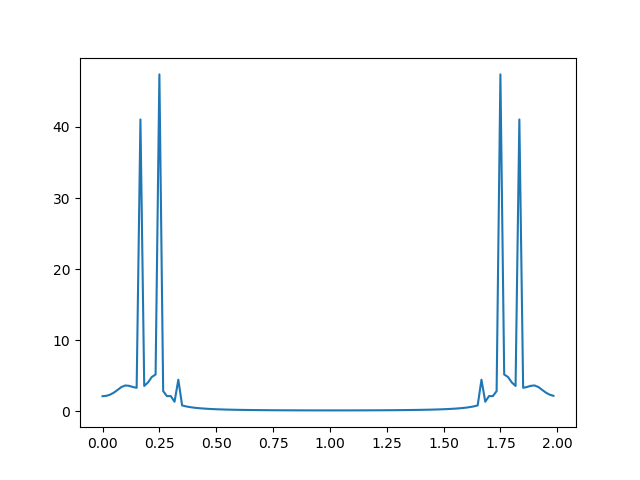

In [114]:
### KOD
y = signal.lfilter(b, a, x)
pyplot.figure()
pyplot.plot(y)
pyplot.figure()
Y = fft.fft(y)
n = np.arange(len(Y)) * 2 / len(Y)
pyplot.plot(n, np.abs(Y))